In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [2]:
application_data = pd.read_csv('data_prepared.csv')
final_test_data = pd.read_csv('test_data_prepared.csv')

In [3]:
application_data.head()

Unnamed: 0  row_id  loan_type  property_type  loan_purpose  occupancy  \
0           0       0          2              1             1          1   
1           1       1          2              2             1          1   
2           2       2          1              2             1          1   
3           3       3          1              2             1          1   
4           4       4          2              1             2          1   

   loan_amount  preapproval  msa_md  state_code  ...  \
0        139.0            1     261          14  ...   
1        160.0            3     349          48  ...   
2        168.0            3     385          30  ...   
3         57.0            3     117          30  ...   
4         25.0            3      95          41  ...   

   tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
0                     100.000                          1556.0   
1                      75.729                           875.0   
2                      76.948                           636.0   
3                      78.836                          1587.0   
4                      59.579                           756.0   

   number_of_1_to_4_family_units  lender  co_applicant  rate_spread  \
0                         1993.0    2094          True          1.0   
1                         1163.0    4194         False          2.0   
2                         1611.0    1119         False          3.0   
3                         2172.0    1119         False          6.0   
4                         1992.0    1593         False          4.0   

   log_loan_amount  log_applicant_income  log_tract_to_msa_md_income_pct  \
0         4.934474              4.343805                        4.605170   
1         5.075174              3.737670                        4.327161   
2         5.123964              3.526361                        4.343130   
3         4.043051              3.610918                        4.367370   
4         3.218876              3.828641                        4.087303   

   log_rate_spread  
0         0.000000  
1         0.693147  
2         1.098612  
3         1.791759  
4         1.386294  

[5 rows x 28 columns]

In [4]:
application_data.dtypes

Unnamed: 0                          int64
row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
rate_spread                       

In [5]:
application_data.isna().sum()

Unnamed: 0                        0
row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
rate_spread                       0
log_loan_amount                   0
log_applicant_income              0
log_tract_to_msa_md_income_pct    0
log_rate_spread             

In [6]:
useless_columns = ['Unnamed: 0', 'row_id', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'minority_population_pct',
                   'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',  'log_rate_spread',
                   'log_loan_amount', 'log_applicant_income','log_tract_to_msa_md_income_pct']
train_data=application_data.drop(useless_columns, axis=1)

In [7]:
train_data.describe()

loan_type  property_type   loan_purpose      occupancy  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.570935       1.154880       1.482605       1.061385   
std         0.559410       0.365066       0.822156       0.246043   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         2.000000       1.000000       1.000000       1.000000   
75%         2.000000       1.000000       2.000000       1.000000   
max         4.000000       3.000000       3.000000       3.000000   

         loan_amount    preapproval         msa_md     state_code  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean      142.574940       2.702950     226.974970      28.202045   
std       142.559487       0.545658     106.655259      15.593383   
min         1.000000       1.000000       0.000000      -1.000000   
25%        67.000000       2.000000     154.000000      14.000000   
50%       116.000000       3.000000     261.000000      30.000000   
75%       179.000000       3.000000     318.000000      41.000000   
max     11104.000000       3.000000     408.000000      52.000000   

         county_code  applicant_income     population  \
count  200000.000000     200000.000000  200000.000000   
mean      166.335230         72.674640    5386.788910   
std        92.852518        102.904942    2656.030727   
min         0.000000          1.000000       7.000000   
25%        83.000000         40.000000    3730.000000   
50%       181.000000         56.000000    4959.000000   
75%       249.000000         80.000000    6450.000000   
max       316.000000      10042.000000   34126.000000   

       ffiecmedian_family_income  tract_to_msa_md_income_pct         lender  \
count              200000.000000               200000.000000  200000.000000   
mean                64584.335520                   89.380895    2001.311505   
std                 12661.689725                   15.014118    1271.134197   
min                 17860.000000                    6.193000       0.000000   
25%                 56763.000000                   81.846750     963.000000   
50%                 63485.000000                   98.959000    1834.000000   
75%                 71176.000000                  100.000000    3180.000000   
max                125095.000000                  100.000000    4283.000000   

         rate_spread  
count  200000.000000  
mean        1.970540  
std         1.587035  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         2.000000  
max         9.000000

In [8]:
X = train_data.iloc[:, 0:15].values
y = train_data.iloc[:, 15].values

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [12]:
def print_feature_importance(column_names):
    for col in column_names:
        print(col, " starts:")
        for name, importance in zip(train_data[col], regressor.feature_importances_):
            print(name, "=", importance)

col_names = ["loan_type", "property_type", "loan_purpose", "loan_amount", "applicant_race", "applicant_income", "ffiecmedian_family_income", "rate_spread"]
#print_feature_importance(col_names)

In [13]:
train_data.describe()

loan_type  property_type   loan_purpose      occupancy  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.570935       1.154880       1.482605       1.061385   
std         0.559410       0.365066       0.822156       0.246043   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         2.000000       1.000000       1.000000       1.000000   
75%         2.000000       1.000000       2.000000       1.000000   
max         4.000000       3.000000       3.000000       3.000000   

         loan_amount    preapproval         msa_md     state_code  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean      142.574940       2.702950     226.974970      28.202045   
std       142.559487       0.545658     106.655259      15.593383   
min         1.000000       1.000000       0.000000      -1.000000   
25%        67.000000       2.000000     154.000000      14.000000   
50%       116.000000       3.000000     261.000000      30.000000   
75%       179.000000       3.000000     318.000000      41.000000   
max     11104.000000       3.000000     408.000000      52.000000   

         county_code  applicant_income     population  \
count  200000.000000     200000.000000  200000.000000   
mean      166.335230         72.674640    5386.788910   
std        92.852518        102.904942    2656.030727   
min         0.000000          1.000000       7.000000   
25%        83.000000         40.000000    3730.000000   
50%       181.000000         56.000000    4959.000000   
75%       249.000000         80.000000    6450.000000   
max       316.000000      10042.000000   34126.000000   

       ffiecmedian_family_income  tract_to_msa_md_income_pct         lender  \
count              200000.000000               200000.000000  200000.000000   
mean                64584.335520                   89.380895    2001.311505   
std                 12661.689725                   15.014118    1271.134197   
min                 17860.000000                    6.193000       0.000000   
25%                 56763.000000                   81.846750     963.000000   
50%                 63485.000000                   98.959000    1834.000000   
75%                 71176.000000                  100.000000    3180.000000   
max                125095.000000                  100.000000    4283.000000   

         rate_spread  
count  200000.000000  
mean        1.970540  
std         1.587035  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         2.000000  
max         9.000000

                            importance
property_type                 0.291312
lender                        0.205376
loan_amount                   0.166161
loan_type                     0.091837
applicant_income              0.045297
ffiecmedian_family_income     0.041144
population                    0.035912
county_code                   0.027182
state_code                    0.026831
msa_md                        0.022354
tract_to_msa_md_income_pct    0.020281
loan_purpose                  0.008950
occupancy                     0.007536
preapproval                   0.005525
co_applicant                  0.004304


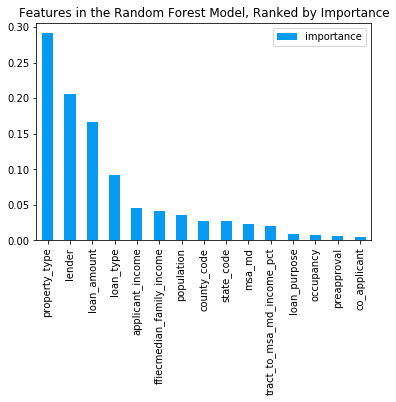

In [14]:
index_data = train_data.drop('rate_spread', axis=1)
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = index_data.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)
feature_importances.plot(kind='bar', title='Features in the Random Forest Model, Ranked by Importance', color='xkcd:azure')

In [15]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5299969917123809
Mean Squared Error: 0.6117943904672236
Root Mean Squared Error: 0.7821728648241536


In [16]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

print_metrics(y_test, y_pred, 28)  

Mean Square Error      = 0.6117943904672236
Root Mean Square Error = 0.7821728648241536
Mean Absolute Error    = 0.5299969917123809
Median Absolute Error  = 0.3500000000000001
R^2                    = 0.7539350251387574
Adjusted R^2           = 0.7537688149335825


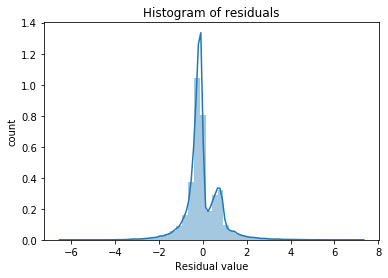

In [17]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_pred)

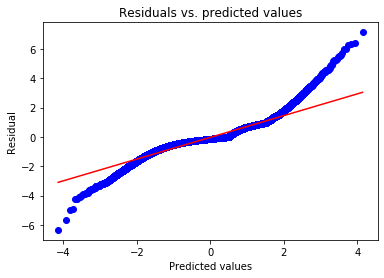

In [18]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_pred)

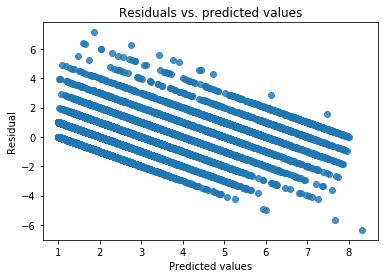

In [19]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_pred)

In [20]:
print(train_data['rate_spread'].describe())

count    200000.000000
mean          1.970540
std           1.587035
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: rate_spread, dtype: float64


In [21]:
useless_columns = ['Unnamed: 0', 'row_id', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'minority_population_pct',
                   'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']
train_test_data=final_test_data.drop(useless_columns, axis=1)

In [22]:
train_test_data.isna().sum()

loan_type                     0
property_type                 0
loan_purpose                  0
occupancy                     0
loan_amount                   0
preapproval                   0
msa_md                        0
state_code                    0
county_code                   0
applicant_income              0
population                    0
ffiecmedian_family_income     0
tract_to_msa_md_income_pct    0
lender                        0
co_applicant                  0
dtype: int64

In [23]:
X_evaluate = train_test_data.iloc[:, 0:15].values

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_evaluate_train = sc.fit_transform(X_evaluate)
X_evaluate_test = sc.transform(X_evaluate)

In [25]:
test_pred = regressor.predict(X_evaluate_test)

In [26]:
# Merge test set with test predictions. Only keep building_id and the damage_grade prediction
submission = pd.DataFrame(data=test_pred, columns=['rate_spread'])
submission['row_id'] = final_test_data['row_id']

In [27]:
submission.dtypes

rate_spread    float64
row_id           int64
dtype: object

In [28]:
header = ['row_id','rate_spread']
submission.to_csv('submission.csv', columns=header, index=False)